In [1]:
from sympy import Matrix, zeros, factorial, Integer
from sympy import init_printing
init_printing(use_unicode=False, wrap_line=False)

# Build the scheme coefficients
number of points $= 2p+1$ 

indexing $0$ to $+2p$


aprroximate $m$th derivative $m<2p+1$

at the $k$th point $k\in [0,2p] \wedge k\in \mathbb{Z}$

(to get the matrix coeff just use the Taylor expansion)



In [2]:
def matrix_coef(i,j,p,k):
    return Integer(j-k)**i
    #return (j-k)**i
def init_mat(p,k):
    num=2*p+1
    A=zeros(num,num)
    for i in range(num):
        for j in range(num):
            A[i,j]=matrix_coef(i,j,p,k)
    return A

def init_vec(m,p):#m-th derivative
    num=2*p+1

    b=zeros(num,1)
    b[m,0]=factorial(m)
    return b


def get_coeff_vector(p,m,k):
    A=init_mat(p,k)
    b=init_vec(m,p)
    
    x=A.LUsolve(b)
    return x

def get_coeff_vector2(p,m,k):
    A=init_mat(p,k)
    b=init_vec(m,p)
    
    x=A.cholesky_solve(b)    
    return x

def get_coeff_vector3(p,m,k):
    A=init_mat(p,k)
    b=init_vec(m,p)
    
    x=A.QRsolve(b)
    return x

def get_coeff_vector4(p,m,k):
    A=init_mat(p,k)
    b=init_vec(m,p)
    
    x=A.pinv_solve(b)
    return x

def get_coeff_vector5(p,m,k):
    A=init_mat(p,k)
    b=init_vec(m,p)
    
    x=A.LDLsolve(b)
    return x

def get_coeff_vector6(p,m,k):
    A=init_mat(p,k)
    b=init_vec(m,p)
    
    x=A.gauss_jordan_solve(b)
    return x


In [3]:
p=2
k=p
m=2

x=get_coeff_vector(p,m,k)

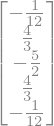

In [4]:
x

In [5]:
#%timeit x=get_coeff_vector(p,m,k)

In [6]:
min_num=5
max_num=20
for i in range(min_num,max_num+1):
    %timeit x=get_coeff_vector(i,m,k)

10.8 ms ± 69.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.4 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.8 ms ± 431 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
37.8 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.7 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
67.6 ms ± 825 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
87.3 ms ± 721 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
116 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
144 ms ± 552 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
178 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
215 ms ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
273 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
324 ms ± 6.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
378 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
440 ms ± 5.45 ms per loop 

In [7]:
"""for i in range(min_num,max_num+1):
    %timeit x=get_coeff_vector2(i,m,k)"""

'for i in range(min_num,max_num+1):\n    %timeit x=get_coeff_vector2(i,m,k)'

In [8]:
"""for i in range(min_num,max_num+1):
    %timeit x=get_coeff_vector3(i,m,k)"""

'for i in range(min_num,max_num+1):\n    %timeit x=get_coeff_vector3(i,m,k)'

In [9]:
"""for i in range(min_num,max_num+1):
    %timeit x=get_coeff_vector4(i,m,k)"""

'for i in range(min_num,max_num+1):\n    %timeit x=get_coeff_vector4(i,m,k)'

In [10]:
"""for i in range(min_num,max_num+1):
    %timeit x=get_coeff_vector5(i,m,k)"""

'for i in range(min_num,max_num+1):\n    %timeit x=get_coeff_vector5(i,m,k)'

In [11]:
"""for i in range(min_num,max_num+1):
    %timeit x=get_coeff_vector6(i,m,k)"""

'for i in range(min_num,max_num+1):\n    %timeit x=get_coeff_vector6(i,m,k)'

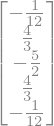

In [12]:
x

In [13]:
print(x)

Matrix([[-1/12], [4/3], [-5/2], [4/3], [-1/12]])
